In [6]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Activation,Dropout,Flatten,Dense
from keras.optimizers import adam_v2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array,load_img

In [7]:
#定义模型
model = Sequential()
model.add(Conv2D(input_shape=(150,150,3),filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Flatten())  #将二维数据变成一维向量
#加上全连接层
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

#定义优化器
adam = adam_v2.Adam(lr=1e-4)

#定义优化器，代价函数，训练过程中计算准确率
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

E:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [8]:
#数据增强
train_datagen = ImageDataGenerator(
    rotation_range = 40,       #随机旋转度数
    width_shift_range = 0.2,   #随机水平位移
    height_shift_range = 0.2,  #随机竖直平移
    rescale = 1/255,           #数据归一化
    shear_range = 0.2,         #随机裁剪
    zoom_range = 0.2,          #随机放大
    horizontal_flip = True,    #水平翻转
    fill_mode = 'nearest',     #填充方式
)

test_datagen = ImageDataGenerator(
    rescale = 1/255,           #数据归一化

)

In [9]:
batch_size = 32  #每次训练会使用32张图片

#读取图像，将所有图像大小调整为150*150
#生成训练数据
train_generator = train_datagen.flow_from_directory(
    'E:/Resource/cat_and_dog/training_set/training_set',
    target_size=(150,150),
    batch_size=batch_size,
)

#生成测试数据
test_generator = test_datagen.flow_from_directory(
    'E:/Resource/cat_and_dog/test_set/test_set',
    target_size=(150,150),
    batch_size=batch_size,
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [10]:
# 查看训练集中的分类索引
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [11]:
# 训练模型，进行25个epochs
history = model.fit_generator(train_generator,epochs=25,validation_data=test_generator)

C:\Users\BOBO\AppData\Local\Temp\ipykernel_19436\3966531378.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,epochs=25,validation_data=test_generator)


Epoch 1/25
251/251 [==============================] - 312s 1s/step - loss: 0.6871 - accuracy: 0.5298 - val_loss: 0.6926 - val_accuracy: 0.5502
Epoch 2/25
251/251 [==============================] - 306s 1s/step - loss: 0.6410 - accuracy: 0.6285 - val_loss: 0.5849 - val_accuracy: 0.6925
Epoch 3/25
251/251 [==============================] - 296s 1s/step - loss: 0.6153 - accuracy: 0.6501 - val_loss: 0.6150 - val_accuracy: 0.6614
Epoch 4/25
251/251 [==============================] - 302s 1s/step - loss: 0.6008 - accuracy: 0.6742 - val_loss: 0.5512 - val_accuracy: 0.7257
Epoch 5/25
251/251 [==============================] - 287s 1s/step - loss: 0.5815 - accuracy: 0.6904 - val_loss: 0.5470 - val_accuracy: 0.7143
Epoch 6/25
251/251 [==============================] - 324s 1s/step - loss: 0.5757 - accuracy: 0.6979 - val_loss: 0.5352 - val_accuracy: 0.7365
Epoch 7/25
251/251 [==============================] - 300s 1s/step - loss: 0.5612 - accuracy: 0.7164 - val_loss: 0.5211 - val_accuracy: 0.7459

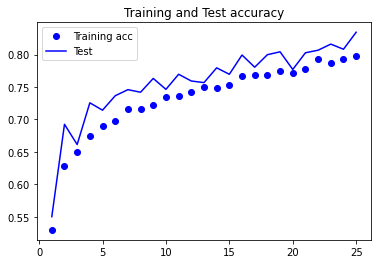

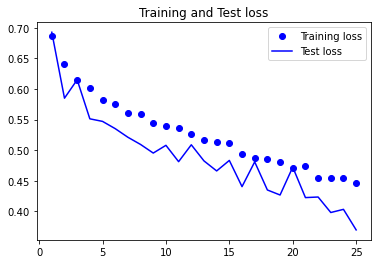

In [12]:
# #保存模型
model.save('model_cnn.h5')
import matplotlib.pyplot as plt
#绘制损失函数和模型准确度
#分别返回测试精度，验证精度，训练损失，验证损失
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(acc) + 1)#迭代次数

#绘制训练精度和验证精度的图,bo表示蓝色圆点表示，b为蓝色曲线
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Test')
plt.title('Training and Test accuracy')
plt.legend()

plt.figure()

#绘制训练损失和验证损失
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Test loss')
plt.title('Training and Test loss')
plt.legend()
plt.show()

In [15]:
from keras.models import load_model
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix,precision_score, recall_score,accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array,load_img

test_datagen = ImageDataGenerator(
    rescale = 1/255,           #数据归一化
)

#生成测试数据
test_generator = test_datagen.flow_from_directory(
    'E:/Resource/cat_and_dog/test_set/test_set',
    target_size=(150,150),
    batch_size=32,
    shuffle=False,
)


label = np.array(['cat','dog'])

#载入模型
model = load_model('model_cnn.h5')

y_pred = model.predict(test_generator)
y_pred = tf.argmax(y_pred,1)
y_test = test_generator.classes
# print(y_pred)
# print(y_test)
print('混淆矩阵: \n' , confusion_matrix(y_test,y_pred))
print('精确率: ' , precision_score(y_test,y_pred,average='macro'))
print('准确率: ' , accuracy_score(y_test,y_pred))
print('召回率: ' , recall_score(y_test,y_pred,average='macro'))

Found 2023 images belonging to 2 classes.
64/64 [==============================] - 17s 256ms/step
混淆矩阵: 
 [[837 174]
 [161 851]]
精确率:  0.8344606285742215
准确率:  0.8344043499752842
召回率:  0.8344011329916374


1/1 [==============================] - 0s 51ms/step


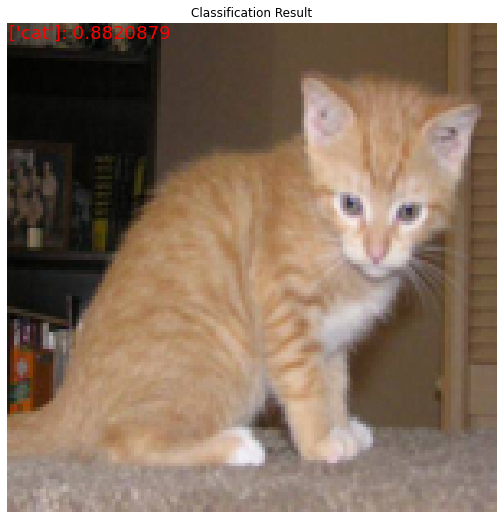

In [54]:
#导入图片
image = load_img('E:/Resource/cat_and_dog/test_set/test_set/cats/cat.4003.jpg')
image = image.resize((150,150))
image = img_to_array(image)
image = image/255

plt.figure(figsize=(9, 9))  # 图形的宽为9高为9
plt.title("Classification Result")
#显示图片
plt.imshow(image)

# 需要给图片增加一个维度
# 将输入数据的形状调整为四维数组，即 (batch_size, height, width, channels)
# 即增加batch_size层，使得image变为（1，height,width,channels）
image = np.expand_dims(image,0)

# 使用模型预测图片中的动物
predict_x=model.predict(image)
classes_x=np.argmax(predict_x,axis=1)

plt.text(0,0,np.array2string(label[classes_x])+': '+str(predict_x[0].max()),fontsize=18,ha='left',va='top',color='red')

plt.axis("off")
plt.show()
# print(label[classes_x])